In [2]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cvx.covariance.iterated_ewma import iterated_ewma, ewma
from cvx.covariance.predictors import *
from cvx.covariance.covariance_combination import CovarianceCombination
# from cvx.covariance.ewma import ewma_cov, ewma_mean
from cvx.covariance.log_likelihood import log_likelihood

%load_ext autoreload
%autoreload 2

In [13]:
import numpy as np
import scipy.sparse as sp

def _get_realized_vars(returns):
    """
    param returns: numpy array where rows are vector of asset returns for t=0,1,...
        returns has shape (T, n) where T is the number of days and n is the number of assets

    returns: (numpy array) list of diag(r_t^2) for all days, i.e,\
        "daily realized variances"
    """

    T, n = returns.shape
    variances = []
    
    for t in range(T):
        r_t = returns[t, :].reshape(-1,)
        diagonal_elements = r_t ** 2
        diagonal_matrix = sp.diags(diagonal_elements, 0, shape=(n, n), format="csr")
        variances.append(diagonal_matrix)
        
    return sp.vstack(variances)

# Example usage
returns = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])
variances = _get_realized_vars(returns)

# Take the element-wise square root of the variances
sqrt_variances = sp.csr_matrix(np.sqrt(variances.data))

# Print the square root of the variances
print(sqrt_variances.toarray())

[[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]]


In [3]:
R = np.vstack([np.array([[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]]), np.array([[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]])]).reshape(2, 3, 3)

D = np.array([[1,2,3], [3,4,5]]).reshape(2,1,3)

In [11]:
diagonal_matrix.toarray()

array([[1., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 3., 0.],
       [0., 0., 0., 4.]])

In [27]:
returns = pd.read_csv("../tests/resources/stock_prices.csv", index_col=0, header=0, parse_dates=True).ffill().iloc[:,:3].pct_change().dropna(axis=0, how="all")

In [3]:
returns = pd.read_csv('../data/ff5_no_rf.csv', index_col=0, parse_dates=True)
# Get quarterly returns
# returns = returns.resample('Q').apply(lambda x: (1+x).prod()-1)

In [2]:
returns = pd.read_csv('../data/49_industries.csv', index_col=0, parse_dates=True).dropna()
# Get quarterly returns
# returns = returns.resample('M').apply(lambda x: (1+x).prod()-1)

In [28]:
data = pd.read_csv("/Users/kasper/Documents/Stanford/Research/Data/SP500/asset_data_2000_to_2023.csv", index_col=0, parse_dates=True)

data = data.drop(["TICKER", "PERMCO"], axis=1)
prices = pd.pivot_table(data, values='PRC', index='date', columns='PERMNO', fill_value=None)
prices.index = pd.to_datetime(prices.index, format="%Y-%m-%d")
returns = prices.pct_change().dropna(axis=0, how="all")

In [5]:
# from cvx.covariance.iterated_ewma import iterated_ewma, ewma
# iewma = iterated_ewma(returns, vola_halflife=125, cov_halflife=250, mean=False, min_periods=20)

In [13]:
# from cvx.covariance.ewma import iterated_ewma

# iewma2 = iterated_ewma(returns, vola_halflife=125, cov_halflife=250, min_periods_vola=1, min_periods_cov=20)


In [7]:
(returns.iloc[0] ==0).sum()

7

In [4]:
iewma_reg = iterated_ewma(returns, vola_halflife=125, cov_halflife=250, min_periods=20, low_rank=20)

TypeError: iterated_ewma() got an unexpected keyword argument 'low_rank'

In [40]:
import 

array([[0.1, 0.2, 0.3],
       [0.4, 0.5, 0.6],
       [0.7, 0.8, 0.9]])

In [111]:
keys = [*Sigmas["10-10"].keys()]
Sigs = np.array([Sigmas["10-10"][key] for key in keys])

In [122]:
iewma = iterated_ewma(returns.loc['2010-01-01':], vola_halflife=63, cov_halflife=125, min_periods_vola=21, min_periods_cov=250, clip_at=3)

In [124]:
iewma2 = iterated_ewma(returns.loc['2010-01-01':], vola_halflife=63, cov_halflife=125, min_periods_vola=21, min_periods_cov=250)

In [102]:
iewma_reg = iterated_ewma(returns.loc['2010-01-01':], vola_halflife=63, cov_halflife=123, min_periods_vola=21, min_periods_cov=250, low_rank=50, clip_at=3)

# LL

In [125]:
r_temp = returns.loc[pd.Series(iewma).index].values[1:]
times = pd.Series(iewma).index[1:]
Sigmas_temp = np.stack([iewma[t].values for t in iewma.keys()])[:-1]

ll = log_likelihood(r_temp*100, Sigmas_temp*10000, means=None)
ll = pd.Series(ll, index=times)

In [126]:
r_temp = returns.loc[pd.Series(iewma2).index].values[1:]
times = pd.Series(iewma2).index[1:]
Sigmas_temp = np.stack([iewma2[t].values for t in iewma2.keys()])[:-1]

ll2 = log_likelihood(r_temp*100, Sigmas_temp*10000, means=None)
ll2 = pd.Series(ll2, index=times)

(-2000.0, 0.0)

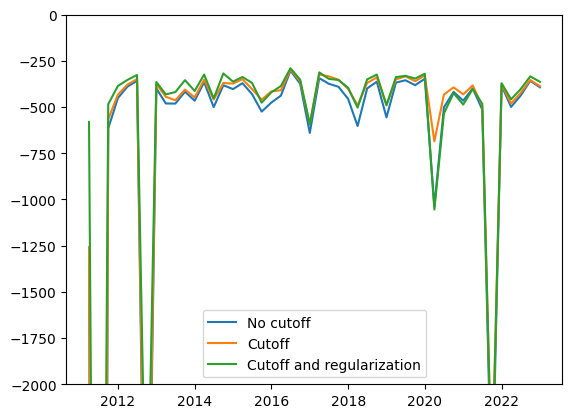

In [133]:
plt.plot(ll.resample("Q").mean(), label="No cutoff")
plt.plot(ll2.resample("Q").mean(), label="Cutoff")
plt.plot(ll_reg.resample("Q").mean(), label="Cutoff and regularization")
plt.legend();
plt.ylim(-2000,0)

In [104]:
r_temp = returns.loc[pd.Series(iewma_reg).index].values[1:]
times = pd.Series(iewma_reg).index[1:]
Sigmas_temp = np.stack([iewma_reg[t].values for t in iewma_reg.keys()])[:-1]

ll_reg = log_likelihood(r_temp*100, Sigmas_temp*10000)
ll_reg = pd.Series(ll_reg, index=times)

(-2000.0, 0.0)

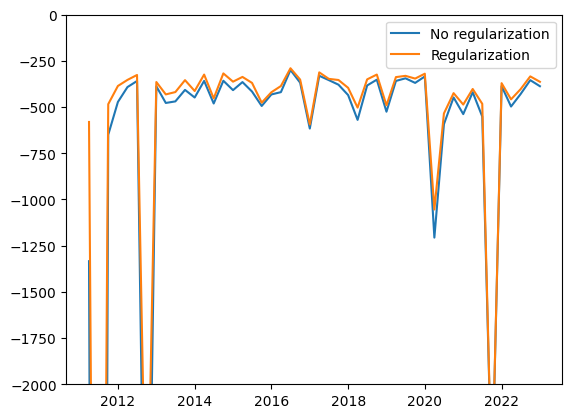

In [107]:
plt.plot(ll.resample("Q").mean(), label="No regularization")
plt.plot(ll_reg.resample("Q").mean(), label="Regularization")
plt.legend();
plt.ylim(-2000,0)

(-2000.0, 0.0)

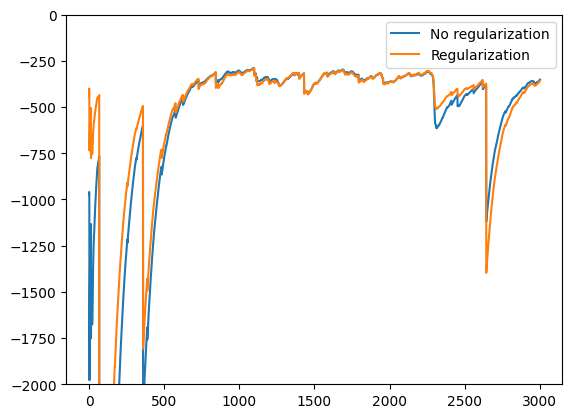

In [75]:
plt.plot(ewma(ll,63), label="No regularization")
plt.plot(ewma(ll_reg,63), label="Regularization")
plt.legend();
plt.ylim(-2000,0)

In [37]:
test = _regularize_correlation(Rs, 3)

In [27]:
R_hat = _regularize_correlation(corr, 3)

In [11]:
V = np.sqrt(np.diagonal(Sigma))
outer_V = np.outer(V,V)
corr2 = Sigma.values / outer_V

In [594]:
ewms = returns.ewm(halflife=21, min_periods=20).cov(bias=True)
ewms = ewms.iloc[100:]
ewms_time  = ewms.index.get_level_values(0).unique()

r_temp = returns.loc[ewms_time].values[1:]
Sigmas_temp = np.stack([ewms.loc[t].values for t in ewms_time])[:-1]

# mean_temp = np.stack([iewma_mean.mean[t].values for t in iewma.keys()])[:-1]

ll_temp_pd = log_likelihood(r_temp, Sigmas_temp, means=None)

In [595]:
r_temp = returns.loc[pd.Series(iewma).index].values[1:]
Sigmas_temp = np.stack([iewma[t].values for t in iewma.keys()])[:-1]

mean_temp = np.stack([iewma_mean.mean[t].values for t in iewma.keys()])[:-1]

ll_temp_no_mean = log_likelihood(r_temp, Sigmas_temp, means=None)

In [596]:
r_temp = returns.loc[pd.Series(iewma_mean.mean).index].values[1:]
mean_temp = np.stack([iewma_mean.mean[t].values for t in iewma_mean.mean.keys()])[:-1]
Sigmas_temp = np.stack([iewma_mean.covariance[t].values for t in iewma_mean.covariance.keys()])[:-1]

ll_temp_mean = log_likelihood(r_temp, Sigmas_temp, means=mean_temp)


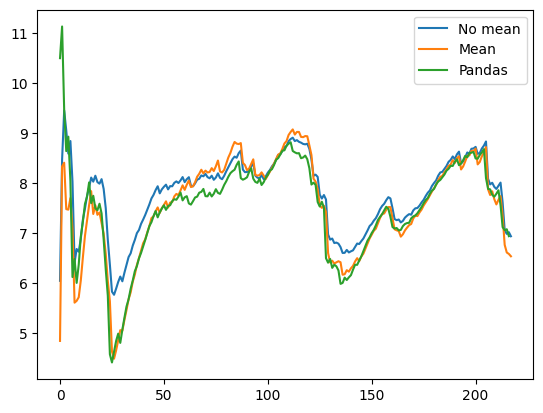

In [597]:
plt.plot(ewma(ll_temp_no_mean,21), label="No mean")
plt.plot(ewma(ll_temp_mean,21), label="Mean")
plt.plot(ewma(ll_temp_pd,21), label="Pandas")
plt.legend();

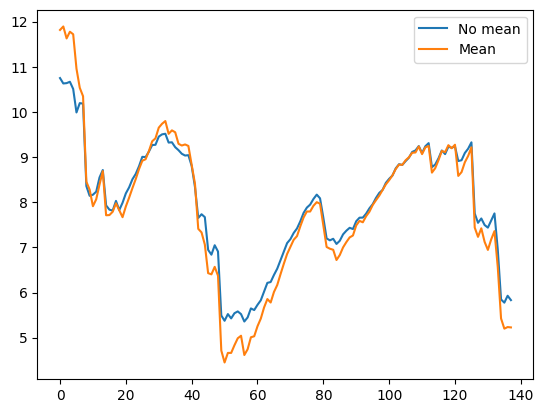

In [534]:
plt.plot(ewma(ll_temp_no_mean,10), label="No mean")
plt.plot(ewma(ll_temp_mean,10), label="Mean")
plt.legend();

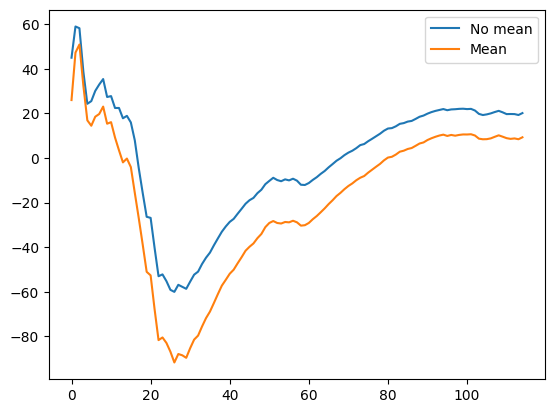

In [458]:
plt.plot(ewma(ll_temp_no_mean,63), label="No mean")
plt.plot(ewma(ll_temp_mean,63), label="Mean")
plt.legend();

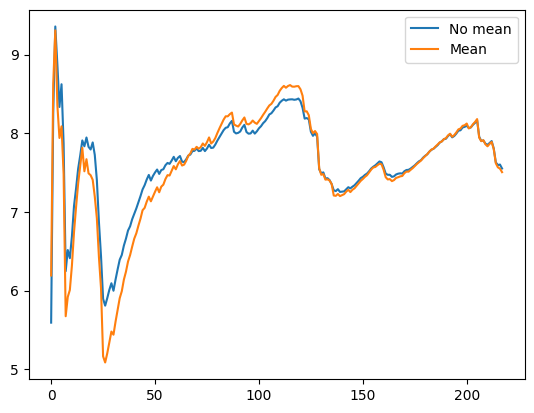

In [394]:
plt.plot(ewma(ll_temp_no_mean,63), label="No mean")
plt.plot(ewma(ll_temp_mean,63), label="Mean")
plt.legend();

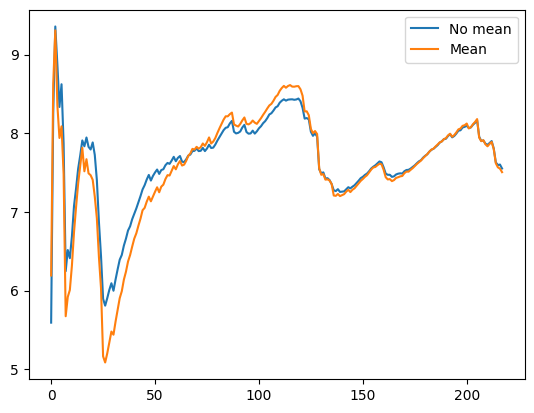

In [395]:
plt.plot(ewma(ll_temp_no_mean,63), label="No mean")
plt.plot(ewma(ll_temp_mean,63), label="Mean")
plt.legend();

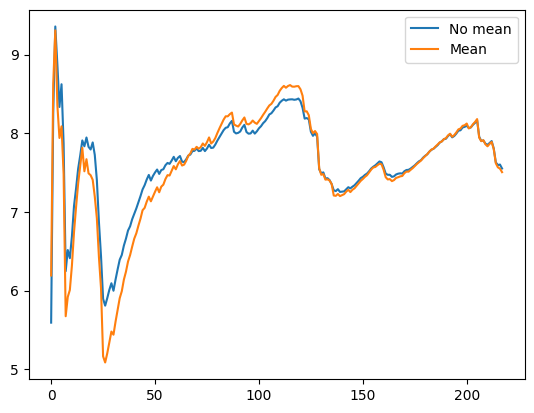

In [396]:
plt.plot(ewma(ll_temp_no_mean,63), label="No mean")
plt.plot(ewma(ll_temp_mean,63), label="Mean")
plt.legend();

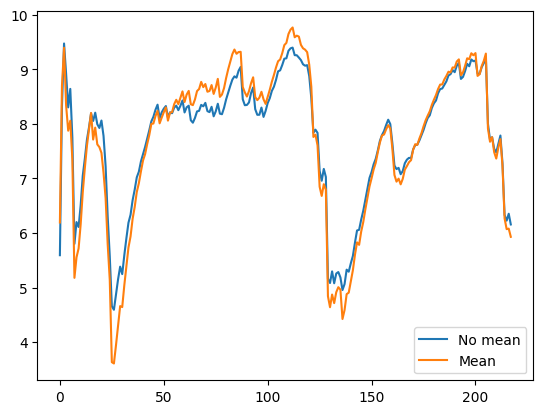

In [397]:
plt.plot(ewma(ll_temp_no_mean,10), label="No mean")
plt.plot(ewma(ll_temp_mean,10), label="Mean")
plt.legend();

In [398]:
iewma_mean.covariance

{Timestamp('1968-06-30 00:00:00', freq='Q-DEC'):           Mkt-RF       SMB       HML       RMW       CMA
 Mkt-RF  0.003565  0.001902  0.000119  0.000442 -0.000513
 SMB     0.001902  0.003259  0.000082  0.000226 -0.000880
 HML     0.000119  0.000082  0.000768 -0.000321  0.000706
 RMW     0.000442  0.000226 -0.000321  0.000334 -0.000422
 CMA    -0.000513 -0.000880  0.000706 -0.000422  0.001254,
 Timestamp('1968-09-30 00:00:00', freq='Q-DEC'):           Mkt-RF       SMB       HML       RMW       CMA
 Mkt-RF  0.003327  0.001729  0.000152  0.000425 -0.000454
 SMB     0.001729  0.003041 -0.000048  0.000329 -0.000916
 HML     0.000152 -0.000048  0.000930 -0.000503  0.000829
 RMW     0.000425  0.000329 -0.000503  0.000518 -0.000571
 CMA    -0.000454 -0.000916  0.000829 -0.000571  0.001326,
 Timestamp('1968-12-31 00:00:00', freq='Q-DEC'):           Mkt-RF       SMB       HML       RMW       CMA
 Mkt-RF  0.003112  0.001618  0.000144  0.000401 -0.000421
 SMB     0.001618  0.002861 -0.000051  0.0

In [399]:
iewma

{Timestamp('1968-06-30 00:00:00', freq='Q-DEC'):           Mkt-RF       SMB       HML       RMW       CMA
 Mkt-RF  0.004222  0.002495  0.000147  0.000593 -0.000914
 SMB     0.002495  0.005016  0.000139  0.000254 -0.000955
 HML     0.000147  0.000139  0.000906 -0.000291  0.000667
 RMW     0.000593  0.000254 -0.000291  0.000370 -0.000487
 CMA    -0.000914 -0.000955  0.000667 -0.000487  0.001356,
 Timestamp('1968-09-30 00:00:00', freq='Q-DEC'):           Mkt-RF       SMB       HML       RMW       CMA
 Mkt-RF  0.003993  0.002384  0.000230  0.000555 -0.000819
 SMB     0.002384  0.004769  0.000252  0.000181 -0.000842
 HML     0.000230  0.000252  0.001144 -0.000493  0.000808
 RMW     0.000555  0.000181 -0.000493  0.000556 -0.000628
 CMA    -0.000819 -0.000842  0.000808 -0.000628  0.001418,
 Timestamp('1968-12-31 00:00:00', freq='Q-DEC'):           Mkt-RF       SMB       HML       RMW       CMA
 Mkt-RF  0.003761  0.002294  0.000233  0.000510 -0.000754
 SMB     0.002294  0.004669  0.000294  0.0

In [400]:
weights.shape

NameError: name 'weights' is not defined

In [ ]:
weights.round()

0   1 
10  10    0.0
21  21    0.0
    63    1.0
Name: 2, dtype: float64

In [ ]:
pairs = [(10, 10), (21, 21), (21, 63)]

    # compute the covariance matrices, one time series for each pair
Sigmas = {pair: iterated_ewma(returns, vola_halflife=pair[0], cov_halflife=pair[1], lower=-4.2, upper=4.2) for pair in pairs}

In [ ]:
def _zero_means(times, n):
    return  {time: np.zeros(n) for time in times}

In [ ]:
None or 1

1

In [ ]:
means = {k: _zero_means(Sigma.keys(), n) for k, Sigma in Sigmas.items()}

In [ ]:
# means = {pair: {1:2} for pair in pairs}
cm_iewma = CovarianceCombination(Sigmas, returns, means)

In [ ]:
cm_iewma.Ls_shifted.keys()

MultiIndex([(10, 10),
            (21, 21),
            (21, 63)],
           )

In [ ]:
def _nu(Ls, means):
    """
    Computes L.T @ mu for each L factor in Ls and corresponding
    mu in means
    """
    return {time:  L.T @ means[time] for time, L in Ls.items()}

In [ ]:
nus = pd.DataFrame({key: _nu(Ls, means[key]) for key, Ls in cm_iewma.Ls_shifted.items()})

In [ ]:
cm_iewma.Ls_shifted

10  \
                                                           10   
2017-03-02  [[171.10928414455176, 0.0, 0.0], [-50.07187114...   
2017-03-03  [[177.3504076829262, 0.0, 0.0], [-54.017977299...   
2017-03-06  [[177.958560723413, 0.0, 0.0], [-49.1368860620...   
2017-03-07  [[184.64414893303413, 0.0, 0.0], [-52.80530742...   
2017-03-08  [[185.11234286540247, 0.0, 0.0], [-55.96049678...   
...                                                       ...   
2018-04-05  [[112.5154046908563, 0.0, 0.0], [-72.982883952...   
2018-04-06  [[107.8290818066785, 0.0, 0.0], [-70.577529310...   
2018-04-09  [[111.27121189274081, 0.0, 0.0], [-71.30969056...   
2018-04-10  [[115.19762207989764, 0.0, 0.0], [-73.82995628...   
2018-04-11  [[111.61083415511462, 0.0, 0.0], [-70.00013358...   

                                                           21  \
                                                           21   
2017-03-02  [[150.24224535429036, 0.0, 0.0], [-33.69058752...   
2017-03-03  [[153.58581005171493, 0.0, 0.0], [-35.44646283...   
2017-03-06  [[155.02217643683423, 0.0, 0.0], [-33.57840174...   
2017-03-07  [[158.48350821272768, 0.0, 0.0], [-35.50193267...   
2017-03-08  [[159.39012605409908, 0.0, 0.0], [-37.11438235...   
...                                                       ...   
2018-04-05  [[99.4694227726234, 0.0, 0.0], [-60.3334286759...   
2018-04-06  [[98.90668152162507, 0.0, 0.0], [-60.269689003...   
2018-04-09  [[100.0578606341585, 0.0, 0.0], [-60.362623390...   
2018-04-10  [[101.65042715194902, 0.0, 0.0], [-61.32128315...   
2018-04-11  [[100.71468750234378, 0.0, 0.0], [-60.07344439...   

                                                               
                                                           63  
2017-03-02  [[145.47237381490604, 0.0, 0.0], [-29.33383162...  
2017-03-03  [[148.18432401853633, 0.0, 0.0], [-30.63699866...  
2017-03-06  [[150.2542577102378, 0.0, 0.0], [-29.498976041...  
2017-03-07  [[153.58290178360622, 0.0, 0.0], [-31.07440216...  
2017-03-08  [[154.83404615711495, 0.0, 0.0], [-32.46847452...  
...                                                       ...  
2018-04-05  [[82.56742500011413, 0.0, 0.0], [-40.904376759...  
2018-04-06  [[83.47166027187254, 0.0, 0.0], [-41.397920162...  
2018-04-09  [[83.80658367372035, 0.0, 0.0], [-41.067713987...  
2018-04-10  [[85.01475115784609, 0.0, 0.0], [-41.625760200...  
2018-04-11  [[85.32406758655895, 0.0, 0.0], [-41.341733118...  

[280 rows x 3 columns]

In [ ]:
nus[(10,10)]['2017-03-02 '].shape

(3,)

In [ ]:
type(cm_iewma._CovarianceCombination__Sigmas[(10,10)])

dict

In [ ]:
sig = Sigmas[(10,10)]

# Create zero mean array for each key in sig



In [ ]:
[*sig.keys()]

[Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-03-02 00:00:00'),
 Timestamp('2017-03-03 00:00:00'),
 Timestamp('2017-03-06 00:00:00'),
 Timestamp('2017-03-07 00:00:00'),
 Timestamp('2017-03-08 00:00:00'),
 Timestamp('2017-03-09 00:00:00'),
 Timestamp('2017-03-10 00:00:00'),
 Timestamp('2017-03-13 00:00:00'),
 Timestamp('2017-03-14 00:00:00'),
 Timestamp('2017-03-15 00:00:00'),
 Timestamp('2017-03-16 00:00:00'),
 Timestamp('2017-03-17 00:00:00'),
 Timestamp('2017-03-20 00:00:00'),
 Timestamp('2017-03-21 00:00:00'),
 Timestamp('2017-03-22 00:00:00'),
 Timestamp('2017-03-23 00:00:00'),
 Timestamp('2017-03-24 00:00:00'),
 Timestamp('2017-03-27 00:00:00'),
 Timestamp('2017-03-28 00:00:00'),
 Timestamp('2017-03-29 00:00:00'),
 Timestamp('2017-03-30 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-03 00:00:00'),
 Timestamp('2017-04-04 00:00:00'),
 Timestamp('2017-04-05 00:00:00'),
 Timestamp('2017-04-06 00:00:00'),
 Timestamp('2017-04-07 00:00:00'),
 Timestamp('2017-04-

In [ ]:
mean

{Timestamp('2017-03-01 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-02 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-03 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-06 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-07 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-08 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-09 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-10 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-13 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-14 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-15 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-16 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-17 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-20 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-21 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-22 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-23 00:00:00'): array([0., 0., 0.]),
 Timestamp('2017-03-24 00:00:00'): array([0., 0.

In [ ]:
weights = pd.read_csv("../tests/resources/weights_combinator.csv", index_col=[0,1], header=None).squeeze()

In [ ]:
weights

0   1 
10  10    2.162604e-09
21  21    2.114762e-08
    63    1.000000e+00
Name: 2, dtype: float64

In [ ]:
iewma_new = iterated_ewma(returns, vola_halflife=10, cov_halflife=21, min_periods_vola=20, min_periods_cov=20, lower=-4.2, upper=4.2)

In [ ]:
iewma_old = IteratedEwmaPredictor(returns, T_half_scale=10, T_half_full=21, init_cutoff=38, lamda=0)

In [ ]:
time_old = [*iewma_old.Sigma_hats.keys()][250]
time_new = returns.index[returns.index.get_loc(time_old)-1]

array([[0.00037455, 0.00023476, 0.00025174],
       [0.00023476, 0.00033715, 0.00018112],
       [0.00025174, 0.00018112, 0.00040914]])

In [ ]:
pd.testing.assert_frame_equal(iewma_new[time_new], pd.DataFrame(iewma_old.Sigma_hats[time_old]), check_names=False)

AssertionError: DataFrame.index are different

DataFrame.index classes are different
[left]:  Index(['GOOG', 'AAPL', 'FB'], dtype='object')
[right]: RangeIndex(start=0, stop=3, step=1)

In [ ]:
time = returns.index[-1]

In [ ]:
iewma_new[time].index

Index(['GOOG', 'AAPL', 'FB'], dtype='object')

In [ ]:
iewma_new[time_new].values

array([[0.00037455, 0.00023476, 0.00025174],
       [0.00023476, 0.00033715, 0.00018112],
       [0.00025174, 0.00018112, 0.00040914]])

In [ ]:
pd.DataFrame(iewma_old.Sigma_hats[time_old]).values

array([[0.00037455, 0.00023476, 0.00025174],
       [0.00023476, 0.00033715, 0.00018112],
       [0.00025174, 0.00018112, 0.00040914]])

In [ ]:
[*iewma_new.keys()][0]